# Data Preprocessing

- __DATA UTAMA__: 
    - **disparbud-od_15420_jml_pengunjung_tempat_rekreasi__jenis_wisatawan_data.csv**: Data jumlah pengunjung tempat rekreasi di Jawa Barat berdasarkan jenis wisatawan pada tahun 2014 - 2020
    - **disparbud-od_15380_jml_pendapatan_asli_drh_bidang_pariwisata__sektor_wisa_data.csv**: Data jumlah pendapatan asli daerah bidang pariwisata berdasarakan 4 sektor wisata di Jawa Barat pada tahun 2014-2020.
    - **dpmdes-od_17247_jml_desa_memiliki_akses_internet__status_keberadaan_data.csv**: Data jumlah desa memiliki akses internet di Jawa Barat pada tahun 2021/
    
    
- __DATA EKSTERNAL__:
    - __Avektive_ED.shp / cpg / dbf /...__: Batas kabupaten kota Desember 2019 DUKCAPIL, sumber: https://indonesia-geospasial.com 
    - __Avektive_ED_02.csv__: Data Vaksinasi Jabar per 09 10 2021, sumber https://vaksin.kemkes.go.id/#/detail_data
    - __Avektive_ED_03.csv__: Data Objek Wisata Tersertifikasi CHSE di Jawa Barat, sumber https://chse.kemenparekraf.go.id/kategori-usaha/daya-tarik-wisata
    - __Avektive_ED_04.csv__: Data Jumlah Daya Tarik Wisata Jabar Tahun 2018, source : https://jabar.bps.go.id/indicator/16/397/1/jumlah-daya-tarik-wisata.html

## Data Dampak Pembatasan Sosial - Dashboard 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False
from numpy import inf
# Display all the columns in pandas without being truncated
pd.options.display.max_columns = None

In [2]:
df_jumlah_pengunjung = pd.read_csv('disparbud-od_15420_jml_pengunjung_tempat_rekreasi__jenis_wisatawan_data.csv')
df_jumlah_pengunjung.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,0,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,0,ORANG,2014
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,2849,ORANG,2014
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,111947,ORANG,2014
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,36518,ORANG,2014


In [3]:
df_jumlah_pengunjung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   376 non-null    int64 
 1   kode_provinsi        376 non-null    int64 
 2   nama_provinsi        376 non-null    object
 3   kode_kabupaten_kota  376 non-null    int64 
 4   nama_kabupaten_kota  376 non-null    object
 5   jenis_wisatawan      376 non-null    object
 6   jumlah_pengunjung    376 non-null    int64 
 7   satuan               376 non-null    object
 8   tahun                376 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 26.6+ KB


In [4]:
# filter hanya data dari tahun 2019 dan 2020
df_jumlah_pengunjung = df_jumlah_pengunjung[(df_jumlah_pengunjung.tahun == 2019) | (df_jumlah_pengunjung.tahun == 2020)]

- Menyediakan 1 kolom khusus untuk memungkinkan join tabel antara dataframe jumlah pengunjung yang sudah kita olah dengan data eksternal berupa batas administratif kabupaten/kota dalam bentuk file shape geospasial dari https://indonesia-geospasial.com.


- Note: Join tabel akan kita lakukan di __Tableau__ guna keperluan visualisasi dalam bentuk map.

In [5]:
# Membuat fungsi untuk menghilangkan kata "Kabupaten" pada field 'nama_kabupaten_kota'
def split(x):
    if "KABUPATEN" in x:
        x = x.split("KABUPATEN ")[1]
    return x

In [6]:
df_jumlah_pengunjung["kab_kota"] = df_jumlah_pengunjung.nama_kabupaten_kota.apply(split)
df_jumlah_pengunjung.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun,kab_kota
268,269,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,26264,ORANG,2019,BOGOR
269,270,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,2670203,ORANG,2019,BOGOR
270,271,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,35613,ORANG,2019,SUKABUMI
271,272,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,942362,ORANG,2019,SUKABUMI
272,273,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,209987,ORANG,2019,CIANJUR


- Simpan dataframe ke dalam format .csv untuk keperluan visualisasi menggunakan Tableau dalam bentuk dashboard.

In [7]:
df_jumlah_pengunjung.to_csv('Avektive_DM.csv')

## Data Kesiapan Daerah Provinsi Jawa Barat - Dashboard 2

In [8]:
#Import Data Vaksinasi Jabar per 09 10 2021, source : https://vaksin.kemkes.go.id/#/detail_data
df_vaksinasi = pd.read_csv('Avektive_ED_02.csv')
df_vaksinasi.head()

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2
0,KABUPATEN BANDUNG,37.70,16.18
1,KABUPATEN BANDUNG BARAT,49.90,23.54
2,KABUPATEN BEKASI,61.22,48.42
3,KABUPATEN BOGOR,42.61,19.54
4,KABUPATEN CIAMIS,29.49,12.14


In [9]:
df_vaksinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kabupaten/Kota      27 non-null     object 
 1   Jumlah Vaksinasi 1  27 non-null     float64
 2   Jumlah Vaksinasi 2  27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


In [10]:
#Import Data Objek Wisata Tersertifikasi CHSE di Jawa Barat, source : https://chse.kemenparekraf.go.id/kategori-usaha/daya-tarik-wisata
df_CHSE = pd.read_csv('Avektive_ED_03.csv')
df_CHSE.head()

,Kabupaten/Kota,Jumlah CHSE
0,KABUPATEN BANDUNG,9
1,KABUPATEN BANDUNG BARAT,13
2,KABUPATEN BEKASI,1
3,KABUPATEN BOGOR,9
4,KABUPATEN CIAMIS,0


In [11]:
df_CHSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kabupaten/Kota  27 non-null     object
 1   Jumlah CHSE     27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


In [12]:
#Merge Data Vaksinasi dengan Jumlah Sertifikat CHSE tiap Kabupaten/Kota
df_master = df_vaksinasi.join( df_CHSE.set_index('Kabupaten/Kota'), on='Kabupaten/Kota')
df_master.head()

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE
0,KABUPATEN BANDUNG,37.70,16.18,9
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13
2,KABUPATEN BEKASI,61.22,48.42,1
3,KABUPATEN BOGOR,42.61,19.54,9
4,KABUPATEN CIAMIS,29.49,12.14,0


In [13]:
#Import Data Jumlah Daya Tarik Wisata Jabar Tahun 2018, source : https://jabar.bps.go.id/indicator/16/397/1/jumlah-daya-tarik-wisata.html
df_daya_tarik_wisata = pd.read_csv('Avektive_ED_04.csv')
df_daya_tarik_wisata.head()

,Kabupaten/Kota,Wisata Alam,Wisata Budaya,Wisata Buatan
0,KABUPATEN BANDUNG,48.0,7.0,39.0
1,KABUPATEN BANDUNG BARAT,64.0,14.0,56.0
2,KABUPATEN BEKASI,5.0,NaN,18.0
3,KABUPATEN BOGOR,55.0,3.0,28.0
4,KABUPATEN CIAMIS,82.0,45.0,16.0


In [14]:
df_daya_tarik_wisata.isna().sum()

Kabupaten/Kota    0
Wisata Alam       4
Wisata Budaya     5
Wisata Buatan     6
dtype: int64

In [15]:
df_daya_tarik_wisata=df_daya_tarik_wisata.fillna(0)
df_daya_tarik_wisata.isna().sum()

Kabupaten/Kota    0
Wisata Alam       0
Wisata Budaya     0
Wisata Buatan     0
dtype: int64

In [16]:
df_daya_tarik_wisata.head()

,Kabupaten/Kota,Wisata Alam,Wisata Budaya,Wisata Buatan
0,KABUPATEN BANDUNG,48.0,7.0,39.0
1,KABUPATEN BANDUNG BARAT,64.0,14.0,56.0
2,KABUPATEN BEKASI,5.0,0.0,18.0
3,KABUPATEN BOGOR,55.0,3.0,28.0
4,KABUPATEN CIAMIS,82.0,45.0,16.0


In [17]:
df_master = df_master.join(df_daya_tarik_wisata.set_index('Kabupaten/Kota'), on = 'Kabupaten/Kota')
df_master.head()

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0


In [18]:
df_master['Total Daya Tarik Wisata']=df_master['Wisata Alam']+df_master['Wisata Budaya']+df_master['Wisata Buatan']
df_master.head()

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0


- Import Data Akses Internet 

In [19]:
df_akses_internet = pd.read_csv('dpmdes-od_17247_jml_desa_memiliki_akses_internet__status_keberadaan_data.csv')
df_akses_internet.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,status_keberadaan,jumlah_desa,satuan,tahun
0,1,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,ADA,368,DESA,2021.0
1,2,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,TIDAK ADA,48,DESA,2021.0
2,3,32.0,JAWA BARAT,3202.0,KABUPATEN SUKABUMI,ADA,299,DESA,2021.0
3,4,32.0,JAWA BARAT,3202.0,KABUPATEN SUKABUMI,TIDAK ADA,82,DESA,2021.0
4,5,32.0,JAWA BARAT,3203.0,KABUPATEN CIANJUR,ADA,253,DESA,2021.0


In [20]:
# Agregat data akses internet berdasarkan nama kabupate kota
df_temp = df_akses_internet.groupby("nama_kabupaten_kota")["jumlah_desa"].agg(["sum"])
df_temp

,sum
nama_kabupaten_kota,
KABUPATEN BANDUNG,270
KABUPATEN BANDUNG BARAT,165
KABUPATEN BEKASI,180
KABUPATEN BOGOR,416
KABUPATEN CIAMIS,258
KABUPATEN CIANJUR,354
KABUPATEN CIREBON,412
KABUPATEN GARUT,421
KABUPATEN INDRAMAYU,309


In [21]:
df_temp = df_temp.reset_index()
df_temp = pd.merge(df_akses_internet,df_temp,on='nama_kabupaten_kota')
df_temp['akses_internet'] = (df_temp['jumlah_desa']/df_temp['sum'])
df_temp = df_temp.iloc[::2]
col_removed = ['id','kode_provinsi','nama_provinsi','kode_kabupaten_kota','status_keberadaan','jumlah_desa','sum','satuan','tahun']
df_temp_columns = df_temp.columns.values.tolist()
keep = [z for z in df_temp_columns if z not in col_removed]
df_temp = df_temp[keep]
df_temp.columns = ["Kabupaten/Kota","Akses_Internet"]
df_temp

,Kabupaten/Kota,Akses_Internet
0,KABUPATEN BOGOR,0.884615
2,KABUPATEN SUKABUMI,0.784777
4,KABUPATEN CIANJUR,0.714689
6,KABUPATEN BANDUNG,0.940741
8,KABUPATEN GARUT,0.703088
10,KABUPATEN TASIKMALAYA,0.740741
12,KABUPATEN CIAMIS,0.864341
14,KABUPATEN KUNINGAN,0.822715
16,KABUPATEN CIREBON,0.849515
18,KABUPATEN MAJALENGKA,0.912121


In [22]:
df_master2 = df_master.join( df_temp.set_index('Kabupaten/Kota'), on='Kabupaten/Kota')
df_master2

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341
5,KABUPATEN CIANJUR,23.20,11.12,5,59.0,9.0,14.0,82.0,0.714689
6,KABUPATEN CIREBON,24.19,13.20,1,7.0,116.0,10.0,133.0,0.849515
7,KABUPATEN GARUT,29.02,12.30,2,102.0,35.0,67.0,204.0,0.703088
8,KABUPATEN INDRAMAYU,27.63,12.95,0,13.0,9.0,6.0,28.0,0.912621
9,KABUPATEN KARAWANG,52.06,33.00,2,44.0,33.0,7.0,84.0,0.801347


In [23]:
df_master2.isna().sum()

Kabupaten/Kota             0
Jumlah Vaksinasi 1         0
Jumlah Vaksinasi 2         0
Jumlah CHSE                0
Wisata Alam                0
Wisata Budaya              0
Wisata Buatan              0
Total Daya Tarik Wisata    0
Akses_Internet             8
dtype: int64

In [24]:
df_master3=df_master2.fillna(1)
df_master3

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341
5,KABUPATEN CIANJUR,23.20,11.12,5,59.0,9.0,14.0,82.0,0.714689
6,KABUPATEN CIREBON,24.19,13.20,1,7.0,116.0,10.0,133.0,0.849515
7,KABUPATEN GARUT,29.02,12.30,2,102.0,35.0,67.0,204.0,0.703088
8,KABUPATEN INDRAMAYU,27.63,12.95,0,13.0,9.0,6.0,28.0,0.912621
9,KABUPATEN KARAWANG,52.06,33.00,2,44.0,33.0,7.0,84.0,0.801347


In [25]:
df_master3['Indeks_CHSE']=df_master3['Jumlah CHSE']/df_master3['Total Daya Tarik Wisata']
df_master3

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet,Indeks_CHSE
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741,0.095745
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485,0.097015
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778,0.043478
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615,0.104651
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341,0.000000
5,KABUPATEN CIANJUR,23.20,11.12,5,59.0,9.0,14.0,82.0,0.714689,0.060976
6,KABUPATEN CIREBON,24.19,13.20,1,7.0,116.0,10.0,133.0,0.849515,0.007519
7,KABUPATEN GARUT,29.02,12.30,2,102.0,35.0,67.0,204.0,0.703088,0.009804
8,KABUPATEN INDRAMAYU,27.63,12.95,0,13.0,9.0,6.0,28.0,0.912621,0.000000
9,KABUPATEN KARAWANG,52.06,33.00,2,44.0,33.0,7.0,84.0,0.801347,0.023810


In [26]:
df_master4=df_master3.fillna(0)

In [27]:
df_master4["Indeks_CHSE"]=df_master4["Indeks_CHSE"].replace([np.inf, -np.inf], 0)

In [28]:
df_master4

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet,Indeks_CHSE
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741,0.095745
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485,0.097015
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778,0.043478
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615,0.104651
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341,0.000000
5,KABUPATEN CIANJUR,23.20,11.12,5,59.0,9.0,14.0,82.0,0.714689,0.060976
6,KABUPATEN CIREBON,24.19,13.20,1,7.0,116.0,10.0,133.0,0.849515,0.007519
7,KABUPATEN GARUT,29.02,12.30,2,102.0,35.0,67.0,204.0,0.703088,0.009804
8,KABUPATEN INDRAMAYU,27.63,12.95,0,13.0,9.0,6.0,28.0,0.912621,0.000000
9,KABUPATEN KARAWANG,52.06,33.00,2,44.0,33.0,7.0,84.0,0.801347,0.023810


In [29]:
df_master4.to_csv('Avektive_DM_02.csv')

## Data untuk Machine Learning Clustering Model

- Mengekstrak data selisih jumlah pendapatan antara tahun 2020 dan 2019 per kabupaten/kota

In [30]:
df_jumlah_pendapatan = pd.read_csv('disparbud-od_15380_jml_pendapatan_asli_drh_bidang_pariwisata__sektor_wisa_data.csv')
df_jumlah_pendapatan

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,0,RUPIAH,2014
...,...,...,...,...,...,...,...,...,...
747,748,32,JAWA BARAT,3278,KOTA TASIKMALAYA,RETRIBUSI,9360323531,RUPIAH,2020
748,749,32,JAWA BARAT,3279,KOTA BANJAR,HIBURAN,47674375,RUPIAH,2020
749,750,32,JAWA BARAT,3279,KOTA BANJAR,RETRIBUSI,0,RUPIAH,2020
750,751,32,JAWA BARAT,3279,KOTA BANJAR,HOTEL,139522734,RUPIAH,2020


In [31]:
df_jumlah_pendapatan = df_jumlah_pendapatan[(df_jumlah_pendapatan.tahun == 2019) | (df_jumlah_pendapatan.tahun == 2020)]
df_jumlah_pendapatan.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
536,537,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2019
537,538,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,0,RUPIAH,2019
538,539,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,0,RUPIAH,2019
539,540,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,0,RUPIAH,2019
540,541,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,801767061,RUPIAH,2019


In [32]:
df_jumlah_pendapatan= df_jumlah_pendapatan.groupby(['nama_kabupaten_kota','tahun']).sum().reset_index()[['nama_kabupaten_kota','tahun', 'jumlah_pendapatan']]

In [33]:
df_jumlah_pendapatan.head()

,nama_kabupaten_kota,tahun,jumlah_pendapatan
0,KABUPATEN BANDUNG,2019,40683449983
1,KABUPATEN BANDUNG,2020,31714024754
2,KABUPATEN BANDUNG BARAT,2019,12398125985
3,KABUPATEN BANDUNG BARAT,2020,28778386002
4,KABUPATEN BEKASI,2019,323632122204


In [34]:
# Menghitung selisih jumlah pendapatan antara tahun 2020 dan 2019
pendapatan_2020 = df_jumlah_pendapatan[df_jumlah_pendapatan.tahun == 2020].reset_index()['jumlah_pendapatan']

In [35]:
pendapatan_2019 = df_jumlah_pendapatan[df_jumlah_pendapatan.tahun == 2019].reset_index()['jumlah_pendapatan']

In [36]:
selisih_pendapatan = pendapatan_2019 - pendapatan_2020

In [37]:
df_master4['selisih_pendapatan_2020_2019'] = selisih_pendapatan
df_master4.head()

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet,Indeks_CHSE,selisih_pendapatan_2020_2019
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741,0.095745,8969425229
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485,0.097015,-16380260017
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778,0.043478,42217594415
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615,0.104651,0
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341,0.000000,1638295982


- Mengekstrak data selisih jumlah wisatawan antara tahun 2020 dan 2019 per kabupaten/kota

In [38]:
df_jumlah_pengunjung_19_20 = df_jumlah_pengunjung.groupby(['nama_kabupaten_kota','tahun']).sum().reset_index()[['nama_kabupaten_kota','tahun', 'jumlah_pengunjung']]

In [39]:
df_jumlah_pengunjung_19_20.head()

,nama_kabupaten_kota,tahun,jumlah_pengunjung
0,KABUPATEN BANDUNG,2019,2579578
1,KABUPATEN BANDUNG,2020,4113427
2,KABUPATEN BANDUNG BARAT,2019,5517072
3,KABUPATEN BANDUNG BARAT,2020,1420031
4,KABUPATEN BEKASI,2019,2095542


In [40]:
pengunjung_2020 = df_jumlah_pengunjung_19_20[df_jumlah_pengunjung_19_20.tahun == 2020].reset_index()['jumlah_pengunjung']
pengunjung_2019 = df_jumlah_pengunjung_19_20[df_jumlah_pengunjung_19_20.tahun == 2019].reset_index()['jumlah_pengunjung']

In [41]:
selisih_pengunjung = pengunjung_2019 - pengunjung_2020

In [42]:
df_master4['selisih_pengunjung_2020_2019'] = selisih_pengunjung
df_master4.head()

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet,Indeks_CHSE,selisih_pendapatan_2020_2019,selisih_pengunjung_2020_2019
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741,0.095745,8969425229,-1533849
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485,0.097015,-16380260017,4097041
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778,0.043478,42217594415,268768
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615,0.104651,0,2668091
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341,0.000000,1638295982,90605


In [43]:
pendapatan_2019

0       40683449983
1       12398125985
2      323632122204
3                 0
4       14335956517
5        6523073700
6                 0
7        1126123500
8        1076000000
9      146297083875
10      39945988775
11       1861319198
12      27913141932
13      33362360442
14       4863405405
15       3600356330
16      22605088818
17       5144426036
18     134152206808
19       1918042561
20    2063023687862
21     256154792524
22      17087749231
23      84374154924
24                0
25                0
26      39020813940
Name: jumlah_pendapatan, dtype: int64

In [44]:
pengunjung_2019

0      2579578
1      5517072
2      2095542
3      2696467
4       742384
5      4900805
6       455757
7      2922225
8      1501152
9     10080168
10      428019
11      703649
12     3227296
13     2208466
14     1294337
15      977975
16      183132
17     1486944
18    10853314
19      141556
20      977438
21     9160884
22       44031
23     1825195
24        1578
25           0
26     1251301
Name: jumlah_pengunjung, dtype: int64

In [45]:
df_master4['Kehilangan Pendapatan']=df_master4['selisih_pendapatan_2020_2019']/pendapatan_2019

In [46]:
df_master4['Kehilangan Pengunjung']=df_master4['selisih_pengunjung_2020_2019']/pengunjung_2019

In [47]:
df_master4

,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet,Indeks_CHSE,selisih_pendapatan_2020_2019,selisih_pengunjung_2020_2019,Kehilangan Pendapatan,Kehilangan Pengunjung
0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741,0.095745,8969425229,-1533849,0.220469,-0.594612
1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485,0.097015,-16380260017,4097041,-1.321188,0.742611
2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778,0.043478,42217594415,268768,0.130449,0.128257
3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615,0.104651,0,2668091,NaN,0.989477
4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341,0.000000,1638295982,90605,0.114279,0.122046
5,KABUPATEN CIANJUR,23.20,11.12,5,59.0,9.0,14.0,82.0,0.714689,0.060976,4207324900,3403997,0.644991,0.694579
6,KABUPATEN CIREBON,24.19,13.20,1,7.0,116.0,10.0,133.0,0.849515,0.007519,-20332921048,-3622,-inf,-0.007947
7,KABUPATEN GARUT,29.02,12.30,2,102.0,35.0,67.0,204.0,0.703088,0.009804,371045012,1012333,0.329489,0.346425
8,KABUPATEN INDRAMAYU,27.63,12.95,0,13.0,9.0,6.0,28.0,0.912621,0.000000,710272000,1270998,0.660104,0.846682
9,KABUPATEN KARAWANG,52.06,33.00,2,44.0,33.0,7.0,84.0,0.801347,0.023810,50515213491,8342189,0.345292,0.827584


In [48]:
df_master4.to_csv('Avektive_DM_03.csv')

## Modelling

In [49]:
df = pd.read_csv('Avektive_DM_03.csv')
df.head()

,Unnamed: 0,Kabupaten/Kota,Jumlah Vaksinasi 1,Jumlah Vaksinasi 2,Jumlah CHSE,Wisata Alam,Wisata Budaya,Wisata Buatan,Total Daya Tarik Wisata,Akses_Internet,Indeks_CHSE,selisih_pendapatan_2020_2019,selisih_pengunjung_2020_2019,Kehilangan Pendapatan,Kehilangan Pengunjung
0,0,KABUPATEN BANDUNG,37.70,16.18,9,48.0,7.0,39.0,94.0,0.940741,0.095745,8969425229,-1533849,0.220469,-0.594612
1,1,KABUPATEN BANDUNG BARAT,49.90,23.54,13,64.0,14.0,56.0,134.0,0.848485,0.097015,-16380260017,4097041,-1.321188,0.742611
2,2,KABUPATEN BEKASI,61.22,48.42,1,5.0,0.0,18.0,23.0,0.777778,0.043478,42217594415,268768,0.130449,0.128257
3,3,KABUPATEN BOGOR,42.61,19.54,9,55.0,3.0,28.0,86.0,0.884615,0.104651,0,2668091,NaN,0.989477
4,4,KABUPATEN CIAMIS,29.49,12.14,0,82.0,45.0,16.0,143.0,0.864341,0.000000,1638295982,90605,0.114279,0.122046


In [50]:
df = df.drop(columns=['Jumlah Vaksinasi 1','Jumlah CHSE','Wisata Alam', 'Wisata Budaya','Wisata Buatan','Unnamed: 0','Total Daya Tarik Wisata','selisih_pendapatan_2020_2019','selisih_pengunjung_2020_2019','Kehilangan Pendapatan'])

In [51]:
## Delete kota depok dan kota sukabumi
## kota depok: data pengunjung 2020 sangat jauh meningkat dari 2019
## kota sukabumi: tidak memiliki daya tarik wisata dan tidak memiliki data 2019 untuk pengunjung

In [52]:
df_sukabumi=df[df["Kabupaten/Kota"]=="KOTA SUKABUMI"]
df_sukabumi['Cluster']=5

<ipython-input-52-aec8703509c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sukabumi['Cluster']=5


In [53]:
df_depok=df[df["Kabupaten/Kota"]=="KOTA DEPOK"]
df_depok['Cluster']=5

<ipython-input-53-05795c9f522a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depok['Cluster']=5


In [55]:
df=df[df["Kabupaten/Kota"].str.contains("KOTA DEPOK|KOTA SUKABUMI")==False]

In [56]:
df=df.fillna(0)

In [57]:
df.index = df['Kabupaten/Kota']

In [58]:
df = df.drop(columns=['Kabupaten/Kota'])

In [59]:
df.head()

,Jumlah Vaksinasi 2,Akses_Internet,Indeks_CHSE,Kehilangan Pengunjung
Kabupaten/Kota,,,,
KABUPATEN BANDUNG,16.18,0.940741,0.095745,-0.594612
KABUPATEN BANDUNG BARAT,23.54,0.848485,0.097015,0.742611
KABUPATEN BEKASI,48.42,0.777778,0.043478,0.128257
KABUPATEN BOGOR,19.54,0.884615,0.104651,0.989477
KABUPATEN CIAMIS,12.14,0.864341,0.000000,0.122046


In [60]:
## Membuang outlier
# Capping X_train values: AVG(X) +- 3*STDDEV(X)
mean_X               = df.mean()
std_X                = df.std()
up_bound             = mean_X + (3*std_X)
low_bound            = mean_X - (3*std_X)
more_than_up_bound   = (df > up_bound)
lower_than_low_bound = (df < low_bound)
df_cap               = df.mask(more_than_up_bound, up_bound, axis=1) 
df_cap               = df_cap.mask(lower_than_low_bound, low_bound, axis=1)
df    = df_cap

# Check data shape
print(df.shape)

(25, 4)


In [61]:
from sklearn.preprocessing import MinMaxScaler
standardize = MinMaxScaler()
data_std = pd.DataFrame(standardize.fit_transform(df))

In [73]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [74]:
def k_means_inertia_silhouette(data, k_max = 9, init = 'k-means++'):
    inertia = []
    silhouette = []
    for k in range(2, k_max):
        km =  KMeans(init = init, n_clusters = k, random_state= 123)
        km.fit(data)
        inertia.append(km.inertia_)
        silhouette.append(silhouette_score(data, km.labels_))
    
    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(2 , k_max) , inertia , 'o')
    plt.plot(np.arange(2 , k_max) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.title('The Elbow method using Inertia for each number of cluster')
    plt.show()

    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(2 , k_max) , silhouette , 'o')
    plt.plot(np.arange(2 , k_max) , silhouette , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette')
    plt.title('Silhouette score for each number of cluster')
    plt.show()
    
    return inertia, silhouette

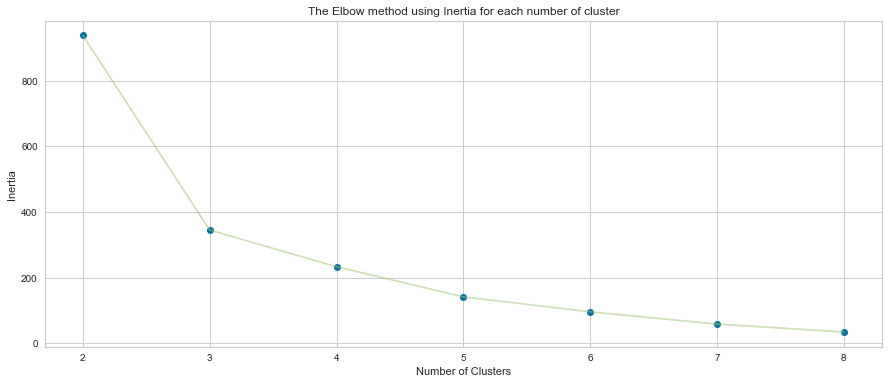

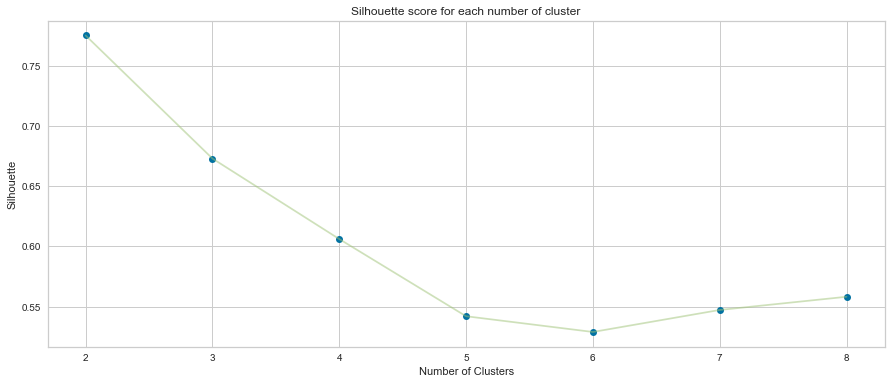

In [75]:
inertia, silhouette = k_means_inertia_silhouette(data = df)

In [77]:
## We choose 4 cluster
k = 4
k_means = KMeans(init = "k-means++", n_clusters = k, random_state= 123)
k_means.fit(data_std)

KMeans(n_clusters=4, random_state=123)

In [78]:
Segment_4 = k_means.labels_
data_std.groupby(Segment_4, as_index=False).mean()

,0,1,2,3
0,0.160328,0.657927,0.097557,0.824130
1,0.831193,0.964917,0.217225,0.795779
2,0.244763,0.206692,0.071570,0.742401
3,0.113903,0.402903,1.000000,0.000000


In [79]:
# We will assign k-means label to our dataframe
cluster = k_means.labels_
df['Cluster'] = cluster

In [80]:
df.sort_values(by=['Cluster'])

,Jumlah Vaksinasi 2,Akses_Internet,Indeks_CHSE,Kehilangan Pengunjung,Cluster
Kabupaten/Kota,,,,,
KABUPATEN BANDUNG,16.18,0.940741,0.095745,-0.594612,0
KABUPATEN SUBANG,16.88,0.873469,0.042553,0.694538,0
KABUPATEN MAJALENGKA,15.38,0.912121,0.005714,0.462778,0
KABUPATEN INDRAMAYU,12.95,0.912621,0.000000,0.846682,0
KABUPATEN CIREBON,13.20,0.849515,0.007519,-0.007947,0
KOTA TASIKMALAYA,26.47,1.000000,0.000000,0.961133,0
KABUPATEN CIAMIS,12.14,0.864341,0.000000,0.122046,0
KABUPATEN BOGOR,19.54,0.884615,0.104651,0.989477,0
KABUPATEN BANDUNG BARAT,23.54,0.848485,0.097015,0.742611,0


In [81]:
df.groupby('Cluster').count()

,Jumlah Vaksinasi 2,Akses_Internet,Indeks_CHSE,Kehilangan Pengunjung
Cluster,,,,
0,9,9,9,9
1,6,6,6,6
2,9,9,9,9
3,1,1,1,1


In [82]:
df=df.reset_index()

In [83]:
df = df.append(df_sukabumi, ignore_index = True)

In [84]:
df = df.append(df_depok, ignore_index = True)

In [85]:
df = df.replace({'Cluster': {0: 1, 1: 2, 2: 3,3: 4}})

In [86]:
df

,Kabupaten/Kota,Jumlah Vaksinasi 2,Akses_Internet,Indeks_CHSE,Kehilangan Pengunjung,Cluster
0,KABUPATEN BANDUNG,16.18,0.940741,0.095745,-0.594612,1
1,KABUPATEN BANDUNG BARAT,23.54,0.848485,0.097015,0.742611,1
2,KABUPATEN BEKASI,48.42,0.777778,0.043478,0.128257,3
3,KABUPATEN BOGOR,19.54,0.884615,0.104651,0.989477,1
4,KABUPATEN CIAMIS,12.14,0.864341,0.000000,0.122046,1
5,KABUPATEN CIANJUR,11.12,0.714689,0.060976,0.694579,3
6,KABUPATEN CIREBON,13.20,0.849515,0.007519,-0.007947,1
7,KABUPATEN GARUT,12.30,0.703088,0.009804,0.346425,3
8,KABUPATEN INDRAMAYU,12.95,0.912621,0.000000,0.846682,1
9,KABUPATEN KARAWANG,33.00,0.801347,0.023810,0.827584,3


In [87]:
# Membuat fungsi untuk menghilangkan kata "Kabupaten" pada field 'nama_kabupaten_kota'
def split(x):
    if "KABUPATEN" in x:
        x = x.split("KABUPATEN ")[1]
    return x

In [88]:
df["kab_kota"] = df['Kabupaten/Kota'].apply(split)
df.head()

,Kabupaten/Kota,Jumlah Vaksinasi 2,Akses_Internet,Indeks_CHSE,Kehilangan Pengunjung,Cluster,kab_kota
0,KABUPATEN BANDUNG,16.18,0.940741,0.095745,-0.594612,1,BANDUNG
1,KABUPATEN BANDUNG BARAT,23.54,0.848485,0.097015,0.742611,1,BANDUNG BARAT
2,KABUPATEN BEKASI,48.42,0.777778,0.043478,0.128257,3,BEKASI
3,KABUPATEN BOGOR,19.54,0.884615,0.104651,0.989477,1,BOGOR
4,KABUPATEN CIAMIS,12.14,0.864341,0.000000,0.122046,1,CIAMIS


In [89]:
df.to_csv('Avektive_DM_04.csv')

In [90]:
df.groupby('Cluster').mean()

,Jumlah Vaksinasi 2,Akses_Internet,Indeks_CHSE,Kehilangan Pengunjung
Cluster,,,,
1,17.364444,0.898434,0.039244,0.468523
2,53.410000,0.989583,0.087383,0.384542
3,21.901111,0.764457,0.028791,0.226429
4,14.870000,0.822715,0.402269,-1.972681
5,35.545000,1.000000,0.020833,-inf


### Kesimpulan
1. Dari data hasil clustering terlihat cluster 4 yaitu Kabupaten Kuningan tidak terdampak pandemi terlihat dari data pada kolom "Kehilangan Pengunjung" yang bernilai negatif yang menandakan pengunjung 2020 lebih tinggi dibandingkan pengunjung 2019. Sedangkan kluster 1,2,3 merupakan cluster yang terdampak pandemi pada sektor pariwisata. 
2. Cluster 2 merupakan cluster yang berhasil melakukan upaya akselerasi pariwisata dengan jumlah vaksinasi dan akses internet yang memadai, namun perlu melakukan peningkatan pada aspek jumlah tempat daya tarik wisata yang tersertifikasi CHSE.
3. Cluster 1 merupakan cluster yang paling terdampak dari adanya pandemi. Namun belum ada upaya signifikan pada jumlah vaksinasi dan indeks CHSE.
4. Cluster 3 merupakan wilayah yang perlu meningkatkan aspek vaksinasi, persebaran akses internet, dan indeks CHSE.

